In [1]:
import os
import glob
import numpy as np
import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from importlib import reload

In [2]:
def load_SST_L3(datafile):
    with netCDF4.Dataset(datafile, "r") as nc:
        lon = nc.variables["lon"][:]
        lat = nc.variables["lat"][:]
        sst = nc.get_variables_by_attributes(standard_name="sea_surface_temperature")[0][:]
    return lon, lat, sst

In [3]:
m = Basemap(projection='ortho',lon_0=-52.,lat_0=10,resolution='c')
mpol = Basemap(projection='npstere', boundinglat=60, lon_0=0, resolution='l')
mpol2 = Basemap(projection='npstere', boundinglat=-60, lon_0=0, resolution='l')

In [4]:
datafile = "/data/SST/CapeGhir/T20001732018263.L3m_SCSU_NSST_sst_4km.nc"

In [5]:
lon, lat, sst = load_SST_L3(datafile)

In [13]:
#goodlon = np.where(np.logical_and(lon>=-150., lon<=45 ))[0]
#sst0 = sst[:, goodlon]
#lon0 = lon[goodlon]
llon, llat = np.meshgrid(lon, lat)
lonp, latp = m(llon, llat)

In [14]:
lonp[lonp==lonp.max()] = np.nan
latp[latp==latp.max()] = np.nan

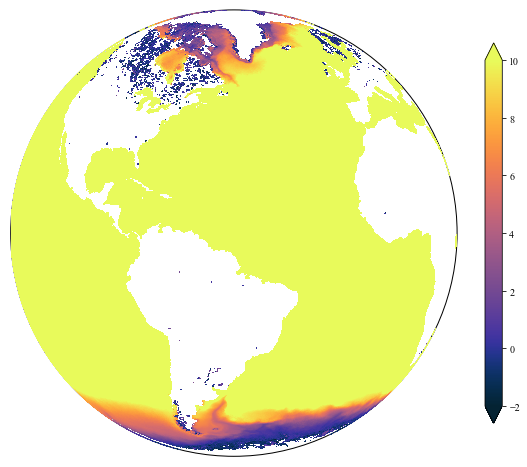

In [15]:
NN = 2
fig = plt.figure(figsize=(10, 10))
#mpol2.drawcoastlines(linewidth=.2)
m.pcolormesh(lonp[::NN], latp[::NN], sst[::NN],
             zorder=3, vmax=10., cmap=cmocean.cm.thermal)
# m.fillcontinents(color='grey')
plt.colorbar(extend="both", shrink=.7)
#mpol2.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
#mpol2.drawcoastlines()
#plt.savefig("SST_antarctic", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [ ]:
sst.min()

In [ ]:
NN = 1
fig = plt.figure(figsize=(10, 10))
m.drawcoastlines(linewidth=.2)
m.pcolormesh(lonp[::NN], lat[::NN], sst[::NN], 
             zorder=3, vmin=5., vmax=27., cmap=plt.cm.RdYlBu_r)
# m.fillcontinents(color='grey')
plt.colorbar(extend="both", shrink=.7)
m.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
m.drawcoastlines()
#plt.savefig("SST_summer_2018", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Latitudinal mean
For each lat, we compute the mean temperature.

In [ ]:
sstmean = sst.mean(axis=1)
sstmeant = np.transpose(np.tile(sstmean, (len(lon), 1)))
print(sstmeant.shape)
sstmeant = sstmeant[:, goodlon]
print(sstmeant.shape)
sstanom = sst0 - sstmeant

In [ ]:
NN = 1
fig = plt.figure(figsize=(10, 10))
m.pcolormesh(lonp[::NN,::NN], latp[::NN,::NN], sstanom[::NN,::NN], 
             zorder=3, cmap=plt.cm.RdBu_r, vmin=-10., vmax=10.)
# m.fillcontinents(color='grey')
plt.colorbar(extend="both", shrink=.7)
m.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
plt.savefig("SST_summer_2018_anom", dpi=300, bbox_inches="tight")
plt.show()
plt.close()